In [12]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
# datasets
categorical_data = pd.read_excel("train_new/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative_data = pd.read_excel("train_new/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
connectome_data = pd.read_csv("train_new/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")


In [4]:
# print(connectome_data)


cat_quant = pd.merge(categorical_data, quantitative_data, on="participant_id", how="inner")
print(cat_quant)

merge_data = pd.merge(cat_quant, connectome_data, on="participant_id", how="inner")

print(merge_data)

merge_data.head()


     participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0      00aIpNTbG5uh                     2019                       4   
1      00fV0OyyoLfw                     2017                       1   
2      04X1eiS79T4B                     2017                       1   
3      05ocQutkURd6                     2018                       1   
4      06YUNBA9ZRLq                     2018                       1   
...             ...                      ...                     ...   
1208   zwjJWCRzKhDz                     2019                       4   
1209   zwXD5v17Rx01                     2018                       1   
1210   zWzLCi3NTBTd                     2018                       3   
1211   Zy9GTHDxUbXU                     2019                       4   
1212   Zye7yYRQohXi                     2017                       1   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                                  1.0                          

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278


In [5]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19928 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19925), int64(2), object(1)
memory usage: 184.4+ MB


In [ ]:
# print(merge_data.isnull())
print(merge_data.isnull().sum())

# drop missing values
merge_data_cleaned = merge_data.dropna(axis=1, thresh=100)

# replace missing values with unknown
# df_filled = merge_data.fillna("Unknown")

# Fill specific columns
merge_data_cleaned['PreInt_Demos_Fam_Child_Ethnicity'] = merge_data['PreInt_Demos_Fam_Child_Ethnicity'].fillna("Unknown")


participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    43
PreInt_Demos_Fam_Child_Race         54
                                    ..
196throw_198thcolumn                 0
196throw_199thcolumn                 0
197throw_198thcolumn                 0
197throw_199thcolumn                 0
198throw_199thcolumn                 0
Length: 19928, dtype: int64


EDA

In [7]:
# quantitative_data.info()

# check for missing dataa
missing = quantitative_data.isnull().sum()
print(missing)


# get summary statistics
print("Summary statistics for quantitatve metadata")
print(quantitative_data.describe().T)


participant_id                  0
EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
dtype: int64
Summary statistics for quantitatve metadata
                             count       mean        std    min        25%  \
EHQ_EHQ_Total               1200.0  59.514750  49.744631 -100.0  46.670000   
ColorVision_CV_Score        1190.0  13.419328   2.112830    0.0  14.000000   
APQ_P_APQ_P_CP              1201.0   3.819317   1.330348    2.0

In [8]:

# Handlling missing data 

# Replacing missing values with unknow 
# cols_to_fill = [
#     'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID',
#     'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
#     'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
#     'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
#     'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial'
# ]

# quantitative_data[cols_to_fill] = quantitative_data[cols_to_fill].fillna('Unknown')

# # Imputing missing values with median value

# quantitative_data['MRI_Track_Age_at_Scan'] = quantitative_data['MRI_Track_Age_at_Scan'].fillna(quantitative_data['MRI_Track_Age_at_Scan'].median())

# missing data ??
# missing = quantitative_data.isnull().sum()
# print(missing)


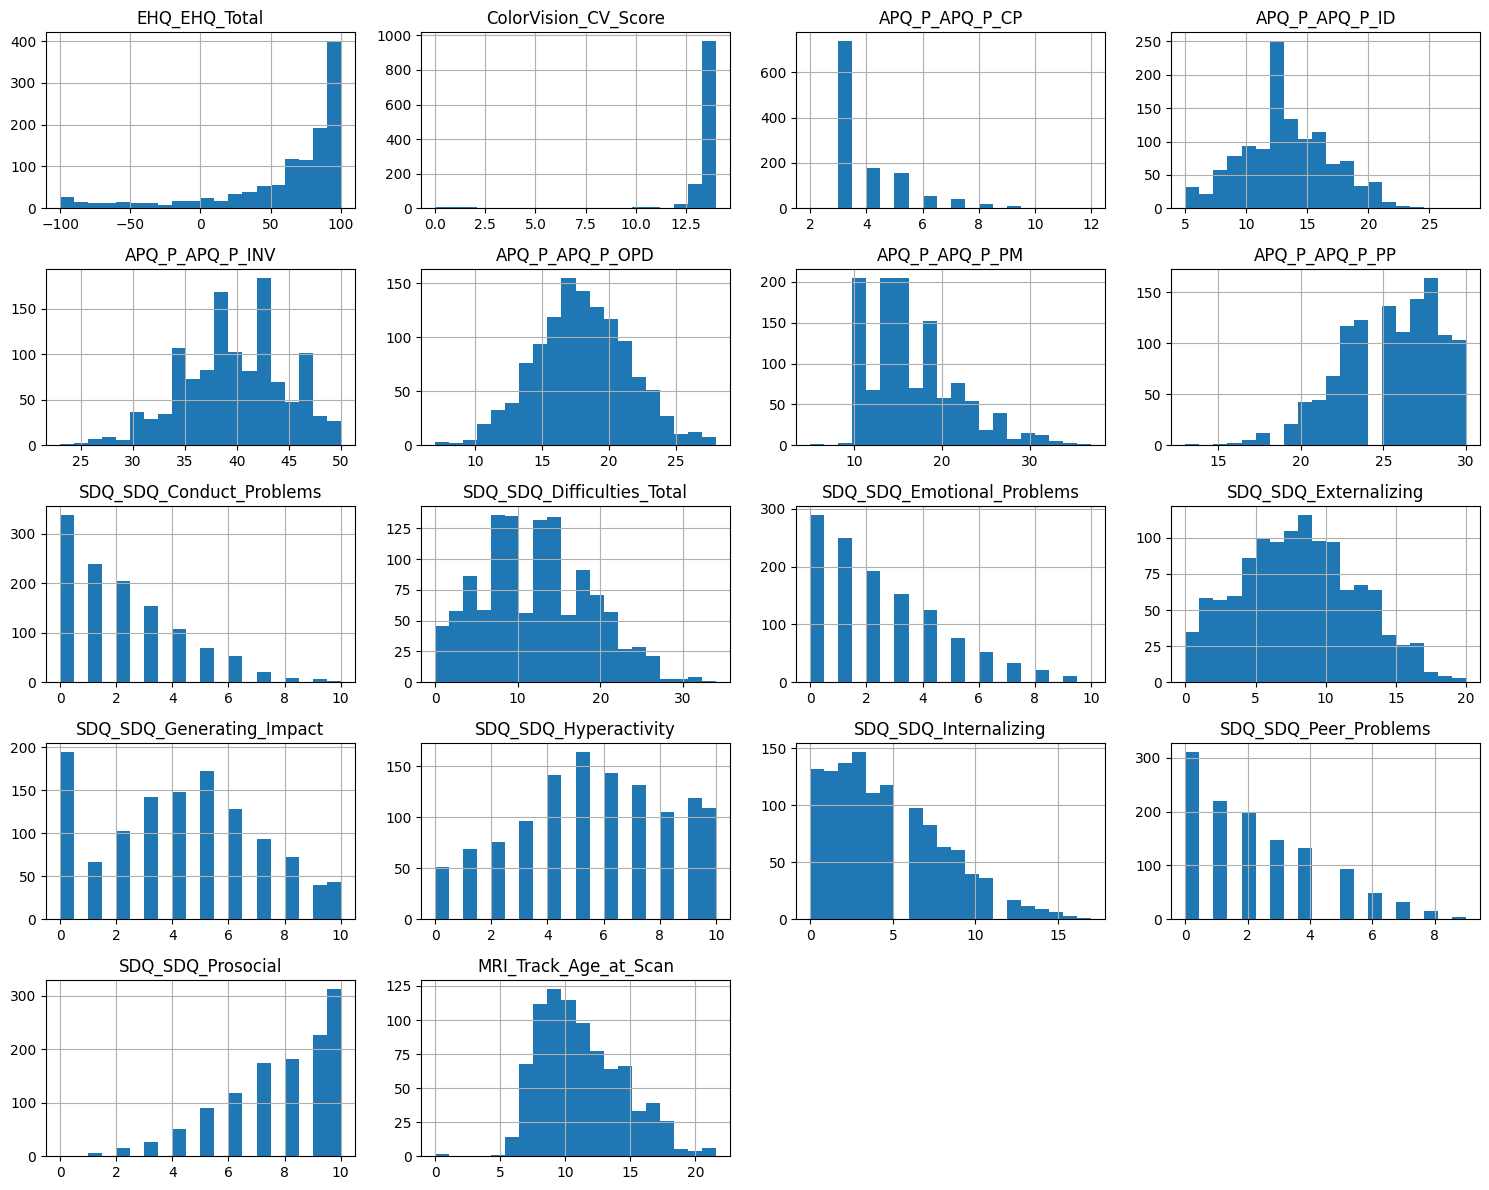

In [9]:

# plots for eda

quantitative_data.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()


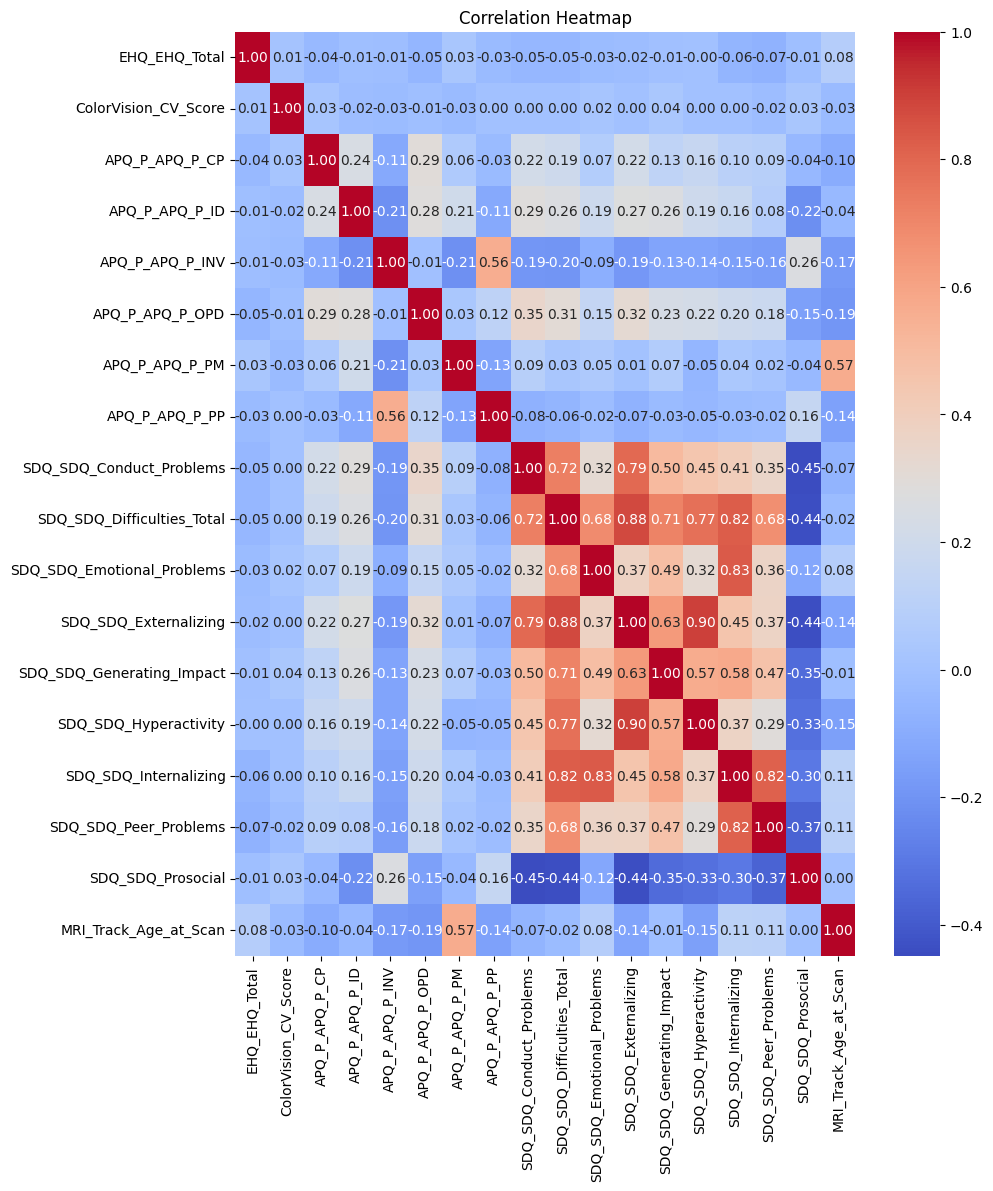

In [10]:

# corrrelation heatmap for quaantitative data
numeric_cols = quantitative_data.select_dtypes(include='number')

plt.figure(figsize=(10,12))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Handling categorrical meta  data 
categorical_data.info()

# check for missing dataa
missing = categorical_data.isnull().sum()
print(missing)


# get summary statistics
print("Summary statistics for quantitatve metadata")
print(categorical_data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB
participant_id                        0
Basic_Demos_Enroll_Year           